In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
happiness2015 = pd.read_csv("happiness2015.csv")
happiness2016 = pd.read_csv("happiness2016.csv")
happiness2017 = pd.read_csv("happiness2017.csv")
happiness2018 = pd.read_csv("happiness2018.csv")
happiness2019 = pd.read_csv("happiness2019.csv")
health2016 = pd.read_csv("health_expenditure2016.csv")
population2020 = pd.read_csv("population2020.csv")
unemployment2019 = pd.read_csv("unemployment2019.csv")
ecfree = pd.read_csv("economic freedom2015-16.csv")
gdp = pd.read_csv("gdp.csv", encoding = "ISO-8859-1", engine='python')

In [4]:
happiness20156 = pd.merge(happiness2015, happiness2016, on = "Country", how = "outer", suffixes = (" 2015", " 2016"))
happiness20178 = pd.merge(happiness2017, happiness2018, on = "Country", how = "outer", suffixes = (" 2017", " 2018"))
happiness = pd.merge(happiness20156, happiness20178, on = "Country", how = "outer")
happiness2019
happiness = pd.merge(happiness, happiness2019, on = "Country", how = "outer")
happiness = happiness.rename(columns={"Happiness Score":"Happiness Score 2019"})
happiness

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...,...,...
165,"Hong Kong S.A.R., China",NaN,NaN,NaN,5.472,NaN,NaN
166,Trinidad & Tobago,NaN,NaN,NaN,NaN,6.192,6.192
167,Northern Cyprus,NaN,NaN,NaN,NaN,5.835,5.718
168,North Macedonia,NaN,NaN,NaN,NaN,NaN,5.274


In [5]:
happiness_pop = pd.merge(population2020, happiness, on = "Country", how = "inner")
happiness_pop

,Country,Population,Density (P/Km²),Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019
0,China,"1,438,207,241",153,Eastern Asia,5.140,5.245,5.273,5.246,5.191
1,India,"1,377,233,523",464,Southern Asia,4.565,4.404,4.315,4.190,4.015
2,United States,"330,610,570",36,North America,7.119,7.104,6.993,6.886,6.892
3,Indonesia,"272,931,713",151,Southeastern Asia,5.399,5.314,5.262,5.093,5.192
4,Pakistan,"219,992,900",287,Southern Asia,5.194,5.132,5.269,5.472,5.653
...,...,...,...,...,...,...,...,...,...
150,Luxembourg,"623,861",242,Western Europe,6.946,6.871,6.863,6.910,7.090
151,Suriname,"585,561",4,Latin America and Caribbean,6.269,6.269,NaN,NaN,NaN
152,Malta,"441,308","1,380",Western Europe,6.302,6.488,6.527,6.627,6.726
153,Belize,"396,120",17,NaN,NaN,5.956,5.956,5.956,NaN


In [6]:
happ_health2016 = pd.merge(happiness2016, health2016, on = "Country", how = "inner")
happ_health2016 = happ_health2016.dropna()
happ_health2016

,Country,Happiness Score,Percent Health Expenditure of GDP,Health Expenditure Per capita USD 2016
0,Denmark,7.526,13.7,5565.6
3,Switzerland,7.509,29.6,9836.0
4,Iceland,7.501,16.9,5063.6
5,Norway,7.498,14.5,7477.9
6,Finland,7.413,20.4,4117.3
...,...,...,...,...
143,Rwanda,3.515,6.4,48.1
144,Benin,3.484,43.5,30.4
145,Afghanistan,3.360,77.4,57.2
146,Togo,3.303,50.4,38.8


In [7]:
unemployment2019
happ_unemploy = pd.merge(happiness, unemployment2019, on = "Country", how = "inner")
happ_unemploy

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Unemployment 2015,Unemployment 2016,Unemployment 2017,Unemployment 2018,Unemployment 2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,4.80,4.92,4.80,4.71,4.58
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,3.98,2.98,2.74,2.70,2.84
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,6.17,6.18,5.74,4.97,4.91
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,4.30,4.68,4.16,3.80,3.35
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,6.91,7.00,6.34,5.83,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,7.58,7.00,6.59,6.51,6.41
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,11.62,11.55,11.41,11.28,11.35
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,20.88,23.35,21.57,19.88,20.27
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,12.57,12.50,12.36,12.23,12.24


In [22]:
happ_unemploy
happ_unemploy["Happ_ave"] = (happ_unemploy["Happiness Score 2015"] + happ_unemploy["Happiness Score 2016"] + happ_unemploy["Happiness Score 2017"] + happ_unemploy["Happiness Score 2018"] + happ_unemploy["Happiness Score 2019"])/5
happ_unemploy["Unemp_ave"] = (happ_unemploy["Unemployment 2015"] + happ_unemploy["Unemployment 2016"] + happ_unemploy["Unemployment 2017"] + happ_unemploy["Unemployment 2018"] + happ_unemploy["Unemployment 2019"])/5
happ_unemploy

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Unemployment 2015,Unemployment 2016,Unemployment 2017,Unemployment 2018,Unemployment 2019,Happ_ave,Unemp_ave
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,4.80,4.92,4.80,4.71,4.58,7.5114,4.762
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,3.98,2.98,2.74,2.70,2.84,7.5110,3.048
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,6.17,6.18,5.74,4.97,4.91,7.5460,5.594
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,4.30,4.68,4.16,3.80,3.35,7.5410,4.058
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,6.91,7.00,6.34,5.83,5.56,7.3506,6.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,7.58,7.00,6.59,6.51,6.41,NaN,6.818
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,11.62,11.55,11.41,11.28,11.35,NaN,11.442
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,20.88,23.35,21.57,19.88,20.27,NaN,21.190
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,12.57,12.50,12.36,12.23,12.24,NaN,12.380


In [24]:
happ_emp = happ_unemploy[["Unemp_ave", "Happ_ave"]]
happ_emp = happ_emp.dropna()

Text(3, 3, 'R value: -0.09')

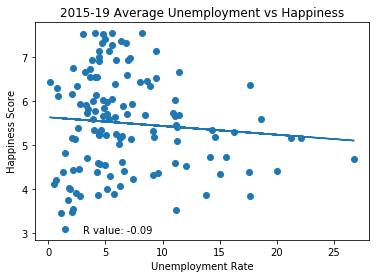

In [27]:
plt.scatter(happ_emp["Unemp_ave"], happ_emp["Happ_ave"])
plt.title("2015-19 Average Unemployment vs Happiness")
plt.ylabel("Happiness Score")
plt.xlabel("Unemployment Rate")
(slope, intercept, rvalue, pvalue, stderr) = linregress(happ_emp["Unemp_ave"], happ_emp["Happ_ave"])
plt.plot(happ_emp["Unemp_ave"], (slope*happ_emp["Unemp_ave"]) + intercept )
rval = "R value: " + str(round(rvalue,2))
plt.annotate(rval,xy = (3,3),fontsize=10)

In [9]:
happ_ecfree = pd.merge(ecfree, happiness20156, on = "Country", how = "inner")
happ_ecfree

,Country,Economic Freedom 2016,Economic Freedom 2015,Region,Happiness Score 2015,Happiness Score 2016
0,Albania,7.54,7.53,Central and Eastern Europe,4.959,4.655
1,Algeria,4.99,4.83,Middle East and Northern Africa,5.605,6.355
2,Angola,5.17,5.44,Sub-Saharan Africa,4.033,3.866
3,Argentina,4.84,4.98,Latin America and Caribbean,6.574,6.650
4,Armenia,7.57,7.59,Central and Eastern Europe,4.350,4.360
...,...,...,...,...,...,...
134,Uruguay,7.16,7.15,Latin America and Caribbean,6.485,6.545
135,Venezuela,2.88,2.96,Latin America and Caribbean,6.810,6.084
136,Vietnam,6.42,6.30,Southeastern Asia,5.360,5.061
137,Zambia,6.61,6.74,Sub-Saharan Africa,5.129,4.795


In [10]:
happ_gdp = pd.merge(happiness, gdp, on = "Country", how = "inner")
happ_gdp

,Country,Region,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Economy (in Millions)
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,"678,965.00"
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,"24,488.00"
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,"329,866.00"
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,"399,489.00"
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,"1,647,120.00"
...,...,...,...,...,...,...,...,...
139,Belize,NaN,NaN,5.956,5.956,5.956,NaN,"1,863.00"
140,Somalia,NaN,NaN,5.440,5.151,4.982,4.668,"7,052.00"
141,Namibia,NaN,NaN,4.574,4.574,4.441,4.639,"13,254.00"
142,South Sudan,NaN,NaN,3.832,3.591,3.254,2.853,"2,904.00"


In [11]:
happ_ecfree

,Country,Economic Freedom 2016,Economic Freedom 2015,Region,Happiness Score 2015,Happiness Score 2016
0,Albania,7.54,7.53,Central and Eastern Europe,4.959,4.655
1,Algeria,4.99,4.83,Middle East and Northern Africa,5.605,6.355
2,Angola,5.17,5.44,Sub-Saharan Africa,4.033,3.866
3,Argentina,4.84,4.98,Latin America and Caribbean,6.574,6.650
4,Armenia,7.57,7.59,Central and Eastern Europe,4.350,4.360
...,...,...,...,...,...,...
134,Uruguay,7.16,7.15,Latin America and Caribbean,6.485,6.545
135,Venezuela,2.88,2.96,Latin America and Caribbean,6.810,6.084
136,Vietnam,6.42,6.30,Southeastern Asia,5.360,5.061
137,Zambia,6.61,6.74,Sub-Saharan Africa,5.129,4.795


In [12]:
hapec2015 = happ_ecfree[["Economic Freedom 2015", "Happiness Score 2015"]]
hapec2015 = hapec2015.dropna()
hapec2016 = happ_ecfree[["Economic Freedom 2016", "Happiness Score 2016"]]
hapec2016 = hapec2016.dropna()

Text(3, 3, 'R value: 0.47')

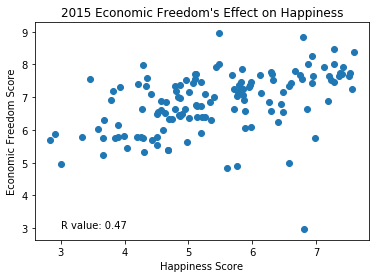

In [13]:
plt.scatter(hapec2015["Happiness Score 2015"], hapec2015["Economic Freedom 2015"])
plt.title("2015 Economic Freedom's Effect on Happiness")
plt.xlabel("Happiness Score")
plt.ylabel("Economic Freedom Score")
(slope, intercept, rvalue, pvalue, stderr) = linregress(hapec2015["Happiness Score 2015"], hapec2015["Economic Freedom 2015"])
rval = "R value: " + str(round(rvalue,2))
plt.annotate(rval,xy = (3,3),fontsize=10)

Text(3, 3, 'R value: 0.48')

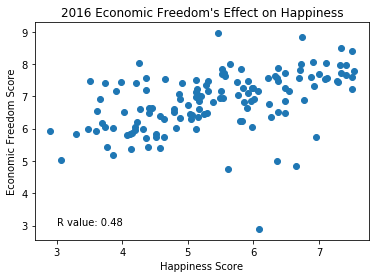

In [14]:
plt.scatter(happ_ecfree["Happiness Score 2016"], happ_ecfree["Economic Freedom 2016"])
plt.title("2016 Economic Freedom's Effect on Happiness")
plt.xlabel("Happiness Score")
plt.ylabel("Economic Freedom Score")
(slope, intercept, rvalue, pvalue, stderr) = linregress(hapec2016["Happiness Score 2016"], hapec2016["Economic Freedom 2016"])
rval = "R value: " + str(round(rvalue,2))
plt.annotate(rval,xy = (3,3),fontsize=10)

Text(3.3, 3, 'R value: 0.47')

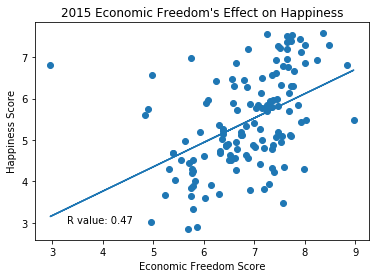

In [15]:
plt.scatter(hapec2015["Economic Freedom 2015"], hapec2015["Happiness Score 2015"])
plt.title("2015 Economic Freedom's Effect on Happiness")
plt.ylabel("Happiness Score")
plt.xlabel("Economic Freedom Score")
(slope, intercept, rvalue, pvalue, stderr) = linregress(hapec2015["Economic Freedom 2015"], hapec2015["Happiness Score 2015"])
plt.plot(hapec2015["Economic Freedom 2015"], (slope*hapec2015["Economic Freedom 2015"]) + intercept )
rval = "R value: " + str(round(rvalue,2))
plt.annotate(rval,xy = (3.3,3),fontsize=10)

Text(3.3, 3, 'R value: 0.48')

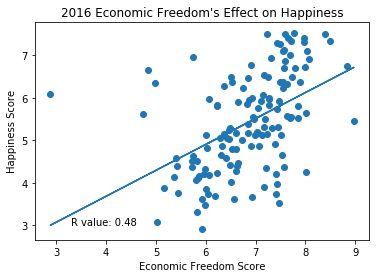

In [16]:
plt.scatter(hapec2016["Economic Freedom 2016"], hapec2016["Happiness Score 2016"])
plt.title("2016 Economic Freedom's Effect on Happiness")
plt.ylabel("Happiness Score")
plt.xlabel("Economic Freedom Score")
(slope, intercept, rvalue, pvalue, stderr) = linregress(hapec2016["Economic Freedom 2016"], hapec2016["Happiness Score 2016"])
rval = "R value: " + str(round(rvalue,2))
plt.plot(hapec2016["Economic Freedom 2016"], (slope*hapec2016["Economic Freedom 2016"]) + intercept )
plt.annotate(rval,xy = (3.3,3),fontsize=10)

In [17]:
#Economic freedom is measured based on five factors: size of government, legal structure and security of property rights, 
#access to sound money, freedom to trade internationally, and regulation of credit, labour and business.

#Medium Correlation, not enough to either refute or support correlation, economic freedom is more a byproduct 
#of countries where people tend to be happier.

#One significant outlier is Venezuela, with virtually no economic freedom, yet above average in happiness score 
#than other countries

Text(0.5, 1.0, '2015-17 World Happiness Factors')

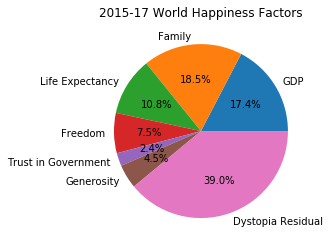

In [18]:
stand2016 = pd.DataFrame({"Name" : ["GDP", "Family", "Life Expectancy", "Freedom", "Trust in Government",
"Generosity", "Dystopia Residual"],
                         "Value": [.93, .99, .58, .40, .13, .24, 2.09]})
plt.pie(stand2016["Value"], labels = stand2016["Name"],autopct='%1.1f%%')
plt.title("2015-17 World Happiness Factors")

Text(0.5, 1.0, '2018-19 World Happiness Factors')

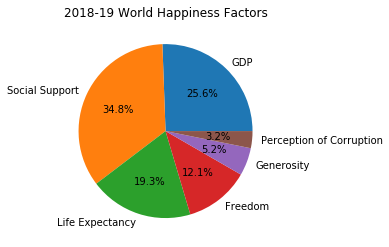

In [19]:
stand2018 = pd.DataFrame({"Name" : ["GDP", "Social Support", "Life Expectancy", "Freedom",
"Generosity", "Perception of Corruption"],
                         "Value": [.89,1.21,.67,.42,.18,.11]})
plt.pie(stand2018["Value"], labels = stand2018["Name"],autopct='%1.1f%%')
plt.title("2018-19 World Happiness Factors")